## *Mini Batch functions*

In [113]:
from tensorflow.keras.datasets import reuters

In [114]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [115]:
word_index=reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [116]:
print('Training Data shape:',train_data.shape)
print('Test Data Shape:',test_data.shape)

Training Data shape: (8982,)
Test Data Shape: (2246,)


In [117]:
reversed_words_index={v:k for k, v in word_index.items()}
' '.join([reversed_words_index.get(i-3,'('+str(i)+')') for i in train_data[0]])

'(1) (2) (2) said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [118]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

## Preprocessing

In [119]:
import numpy as np
def vectorize(sequences,dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results    

### Vectorize train and test data

In [120]:
X_train=vectorize(train_data,10000)
X_test=vectorize(test_data,10000)

In [121]:
print('original values:',train_data[0] [:15])
print('vectorized values:',X_train[0] [:15])

original values: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
vectorized values: [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [122]:
X_train.shape

(8982, 10000)

In [123]:
X_test.shape

(2246, 10000)

In [124]:
from tensorflow.keras.utils import to_categorical

In [125]:
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [126]:
Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
from sklearn.model_selection import train_test_split

## Data Split

In [128]:
X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test,test_size=0.5)

In [129]:
print("Number of training samples:", len(X_train))
print('lenght of X_test:',len(X_test))
print('lenght of Y_test:',len(Y_test))
print('lenght of X_val:',len(X_val))
print('lenght of Y_val:',len(Y_val))

Number of training samples: 8982
lenght of X_test: 1123
lenght of Y_test: 1123
lenght of X_val: 1123
lenght of Y_val: 1123


## Building a ANN

In [130]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [155]:
model=models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [156]:
from tensorflow.keras import optimizers
opt_func=optimizers.SGD(learning_rate=0.01)

In [157]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision']
)

In [158]:
len(X_train)/512

17.54296875

In [159]:
history= model.fit( 
    X_train,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val,Y_val)
)

Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.7102 - accuracy: 0.4135 - loss: 2.8789 - val_Precision: 0.9286 - val_accuracy: 0.5441 - val_loss: 1.8851
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9401 - accuracy: 0.5849 - loss: 1.7146 - val_Precision: 0.9245 - val_accuracy: 0.6171 - val_loss: 1.6678
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9318 - accuracy: 0.6544 - loss: 1.5218 - val_Precision: 0.9104 - val_accuracy: 0.6509 - val_loss: 1.5349
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9272 - accuracy: 0.6933 - loss: 1.3505 - val_Precision: 0.9083 - val_accuracy: 0.6679 - val_loss: 1.4437
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9188 - accuracy: 0.7146 - loss: 1.2924 - val_Precision: 0.9062 - val_accuracy: 0.6866 - val_loss: 1.3732
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.9201 - accuracy: 0.7319 - loss: 1.1981 - val_Precision: 0.9037 - val_accu

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

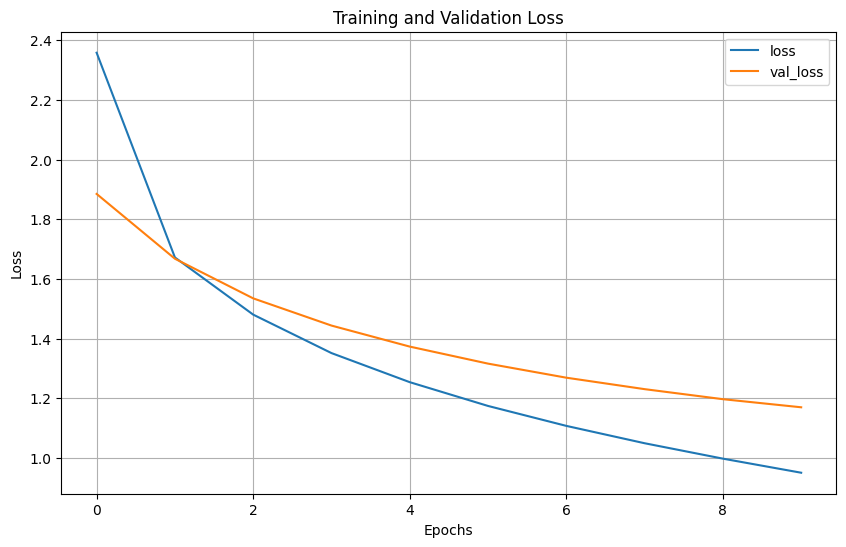

In [160]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

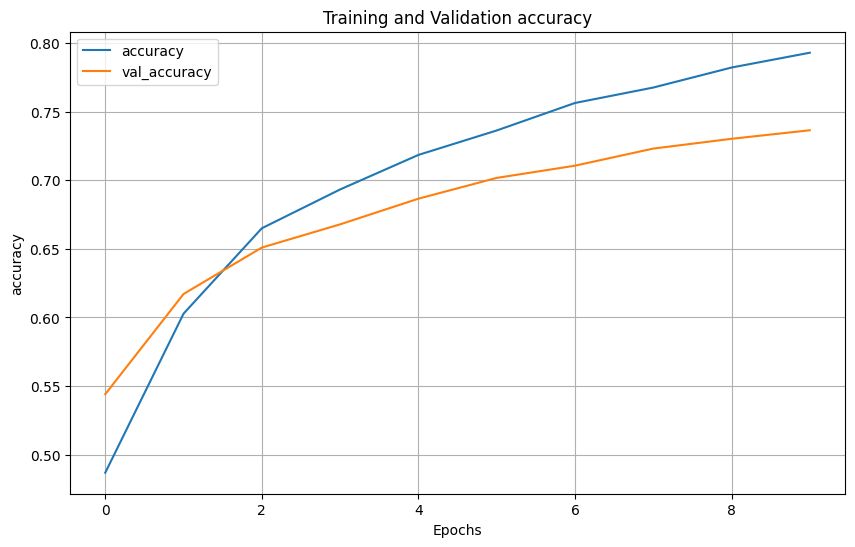

In [161]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.show()